In [14]:
import sys
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, r'..\modules\\')

from modelclass import ModelTrainer

# Overview

1. Logistic Classifier Default
2. XGB Classifier Default
3. XGB Classifier Resample
4. XGB Hyperparameter Tuning

## 1. Logit 

In [15]:
mt =ModelTrainer(data_loc=r'..\data\feature_final.csv')

In [16]:
mt.base_run()

Best Threshold=0.280435, F-Score=0.477
precision, recall, threshold, f1score attributes updated
Best Threshold=0.133744, G-Mean=0.761
tpr, fpr, gmean attributes updated
feature_importance attribute updated


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


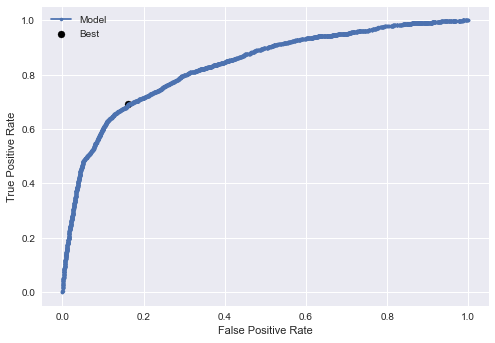

In [18]:
mt.plot_roc_curve()

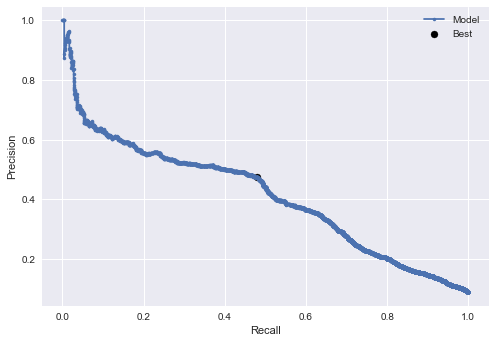

In [17]:
mt.plot_precision_recall_curve()

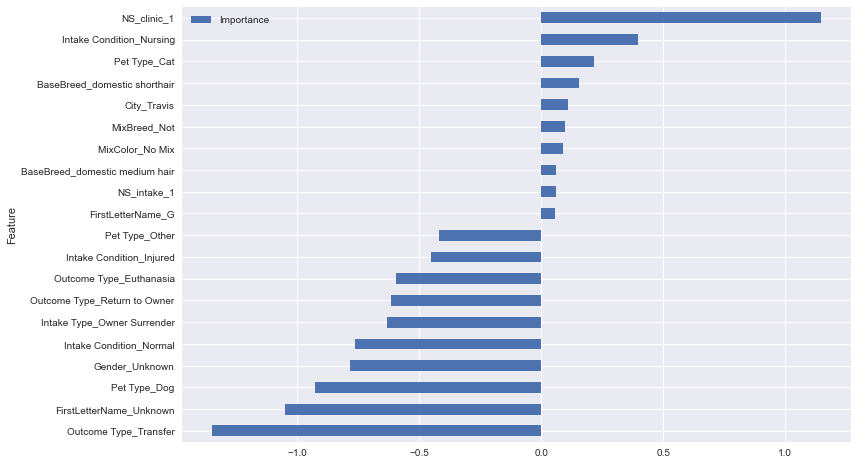

In [20]:
mt.plot_feature_importance()

In [21]:
mt.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,0.477354,0.410713,0.761121,0.833802,0.280435,0.133744,2022-02-22 15:42:46.162488


In [22]:
mt.fi

,ModelName,Feature,Importance
0,log0,Age_Shift1,-0.000127
1,log0,Outcome Type_Euthanasia,-0.596281
2,log0,Outcome Type_Other Outcome,-0.081538
3,log0,Outcome Type_Return to Owner,-0.616867
4,log0,Outcome Type_Transfer,-1.348377
...,...,...,...
125,log0,FirstLetterName_Y,-0.005802
126,log0,FirstLetterName_Z,-0.003568
127,log0,NameLengthBin_long,-0.031716
128,log0,NameLengthBin_med,-0.117530


# 2. XGBoost Base model

In [23]:
xgbm =ModelTrainer(model='xgb')
xgbm.base_run()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.308781, F-Score=0.659
precision, recall, threshold, f1score attributes updated
Best Threshold=0.070381, G-Mean=0.839
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


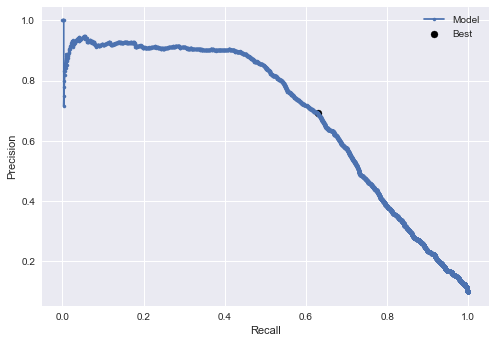

In [24]:
xgbm.plot_precision_recall_curve()

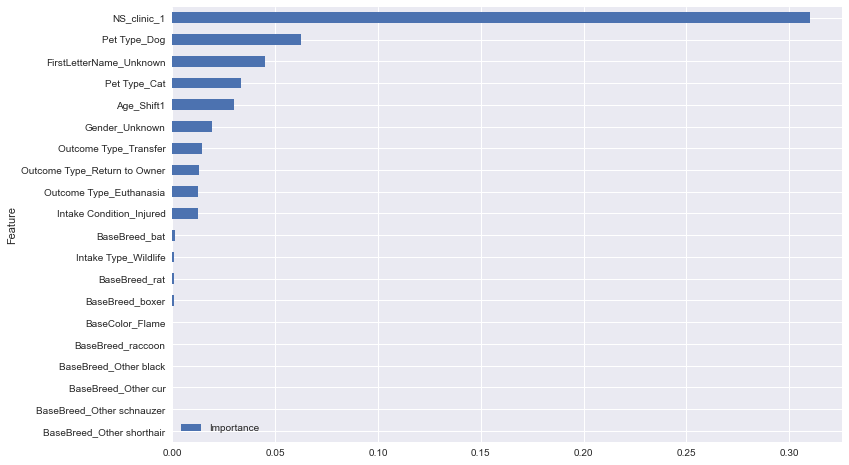

In [30]:
xgbm.plot_feature_importance()

In [31]:
xgbm.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,0.477354,0.410713,0.761121,0.833802,0.280435,0.133744,2022-02-22 15:42:46.162488
0,xgb0,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 15:46:53.989552


<AxesSubplot:ylabel='Feature'>

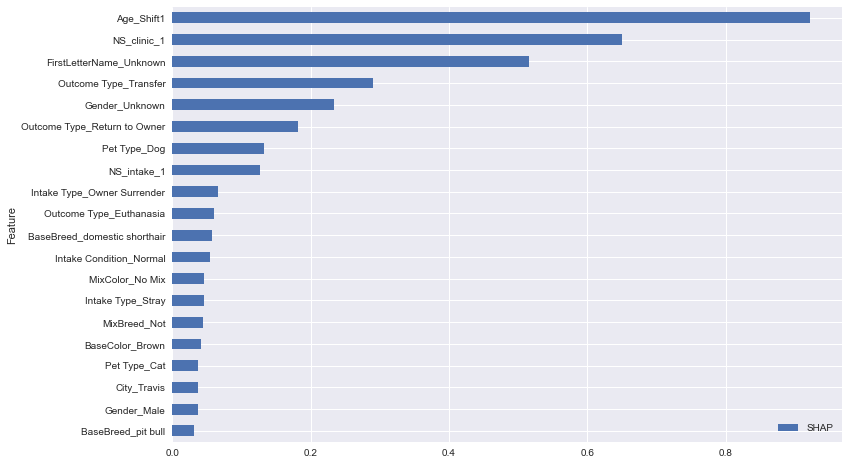

In [46]:
# xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=False).head(20).plot(kind='barh',)
xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=True).tail(20).plot.barh('Feature','SHAP',figsize=(12,8))

# 3. XGBoost Re-sampling

0    55700
1     8355
Name: Time at Center, dtype: int64
[15:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Best Threshold=0.441866, F-Score=0.650
precision, recall, threshold, f1score attributes updated
Best Threshold=0.130436, G-Mean=0.839
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


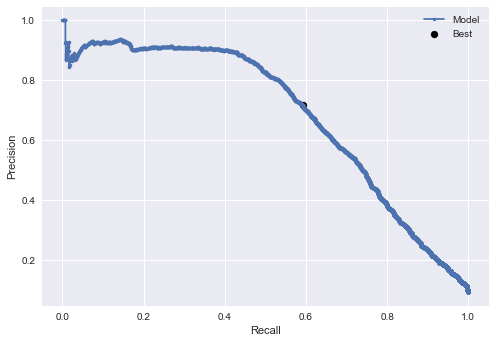

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,0.477354,0.410713,0.761121,0.833802,0.280435,0.133744,2022-02-22 15:42:46.162488
1,xgb0,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 15:46:53.989552


In [47]:
xgbm =ModelTrainer(model='xgb',over_samp='smote',under_samp='random',over_weight=.12,under_weight=.15)
xgbm.base_run()
xgbm.plot_precision_recall_curve()
xgbm.log

## 4. XGBoost Hyperparameter Tuning

In [ ]:
grid = {}
xgbm.optimize_run()